# Análisis de Regresión Lineal Múltiple

In [3]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import os

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
#cargamos la librería de métricas
from sklearn import metrics

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración errores
import warnings
warnings.filterwarnings('ignore')

## Introducción al modelo

El **análisis de regresión lineal múltiple** es un método estadístico que trata de relacionar una variable frente a múltiples variables independientes mediante el ajuste de una ecuación lineal.

En nuestro caso la variable a modelar o **variable respuesta** será el Ranking y el resto de variables serán las **variables independientes o predictores.**





# Datos

In [4]:
# Accedemos a la carpeta de google drive donde tenemos alojados los archivos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# para ir a la carpeta donde tenemos los datos
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

In [6]:
#Leemos los datos del archivo excel donde hemos recopilado todos las métricas de los 10 sitios elegidos y lo almacenamos en una variable de tipo dataframe
dfDatos = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datos.xlsx', header = 'infer', sheet_name='Hoja2')
dfDatos

,Listado de ecommerce,Ranking,Url_amigables,Thin_content,Enlaces_rotos,Etiquetas_OK,CTR,DA,Paginas_visita,Permanencia,Rebote,Velocidad,Rendimiento,FCP,LCP,CLS,TTI,Enlaces_totales,Enlaces_follow,Enlaces_nofollow,Dominios_unicos
0,bitiba.es,14,43.109756,7.317073,0.010000,49.207317,0.12,32,6.26,301,48.07,2.5,23,2.8,10.5,0.114,12.4,151,12,139,43
1,kiwoko.com,2,73.800000,0.010000,0.010000,94.600000,30.38,54,4.44,172,67.48,1.8,25,3.8,12.2,0.557,13.3,798,142,656,152
2,mascoteros.com,8,99.702085,0.010000,0.010000,71.201589,0.01,48,2.10,64,71.33,2.4,38,1.9,2.7,0.030,11.6,1715,1534,181,101
3,maskokotas.com,6,100.000000,0.050000,0.540000,65.200000,1.96,35,3.05,99,63.05,2.5,24,3.5,6.6,0.296,13.6,723,404,319,133
4,miscota.es,3,100.000000,0.060000,0.870000,75.300000,9.71,43,4.05,165,56.25,2.7,31,4.0,4.4,0.134,18.1,796,51,745,74
5,nuestroperro.es,21,94.700000,0.010000,0.010000,86.400000,0.08,32,1.98,241,73.87,1.9,45,3.9,6.8,0.481,6.6,216,29,187,49
6,petclic.es,15,100.000000,0.010000,1.608579,5.540661,0.01,36,3.49,102,55.78,3.5,52,2.8,2.8,0.101,10.5,229,43,186,68
7,tiendanimal.es,4,99.901961,0.010000,0.010000,87.205882,6.58,64,3.97,154,65.29,2.4,40,1.3,5.9,0.016,13.8,1734,247,1487,234
8,zoomalia.es,9,98.744019,0.059809,1.913876,84.090909,2.54,30,4.62,246,51.83,2.9,56,1.8,7.1,0.121,7.5,209,1,208,16
9,zooplus.es,1,13.800000,14.800000,2.300000,46.200000,16.17,52,5.56,276,48.94,2.2,47,2.3,9.8,0.083,8.9,587,74,513,159


In [7]:
# Eliminamos la columna del listado de ecommerce
dfDatos = dfDatos.drop(['Listado de ecommerce'], axis=1)

In [8]:
# Obtenemos los datos estadísticos
dfDatos.describe(include='all')

,Ranking,Url_amigables,Thin_content,Enlaces_rotos,Etiquetas_OK,CTR,DA,Paginas_visita,Permanencia,Rebote,Velocidad,Rendimiento,FCP,LCP,CLS,TTI,Enlaces_totales,Enlaces_follow,Enlaces_nofollow,Dominios_unicos
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,8.300000,82.375782,2.233688,0.728245,66.494636,6.756000,42.600000,3.95200,182.000000,60.189000,2.480000,38.10000,2.810000,6.880000,0.19330,11.630000,715.800000,253.700000,462.100000,102.900000
std,6.532823,30.326034,4.974335,0.899755,26.775188,9.865049,11.500725,1.37245,80.938934,9.290939,0.489444,11.98564,0.968905,3.184965,0.18839,3.414365,589.498996,467.240136,420.450407,66.460431
min,1.000000,13.800000,0.010000,0.010000,5.540661,0.010000,30.000000,1.98000,64.000000,48.070000,1.800000,23.00000,1.300000,2.700000,0.01600,6.600000,151.000000,1.000000,139.000000,16.000000
25%,3.250000,79.025000,0.010000,0.010000,53.205488,0.090000,32.750000,3.16000,115.000000,52.817500,2.250000,26.50000,2.000000,4.775000,0.08750,9.300000,219.250000,32.500000,186.250000,53.750000
50%,7.000000,99.223052,0.030000,0.275000,73.250794,2.250000,39.500000,4.01000,168.500000,59.650000,2.450000,39.00000,2.800000,6.700000,0.11750,12.000000,655.000000,62.500000,263.500000,87.500000
75%,12.750000,99.975490,0.059952,1.423934,85.822727,8.927500,51.000000,4.57500,244.750000,66.932500,2.650000,46.50000,3.725000,9.125000,0.25550,13.525000,797.500000,220.750000,620.250000,147.250000
max,21.000000,100.000000,14.800000,2.300000,94.600000,30.380000,64.000000,6.26000,301.000000,73.870000,3.500000,56.00000,4.000000,12.200000,0.55700,18.100000,1734.000000,1534.000000,1487.000000,234.000000


In [9]:
# Obtenemos la matriz de correlaciones
np.round(dfDatos.corr(),2)

,Ranking,Url_amigables,Thin_content,Enlaces_rotos,Etiquetas_OK,CTR,DA,Paginas_visita,Permanencia,Rebote,Velocidad,Rendimiento,FCP,LCP,CLS,TTI,Enlaces_totales,Enlaces_follow,Enlaces_nofollow,Dominios_unicos
Ranking,1.00,0.23,-0.23,-0.20,-0.26,-0.67,-0.69,-0.34,0.16,0.17,0.19,0.26,0.16,-0.23,0.17,-0.54,-0.52,-0.12,-0.58,-0.64
Url_amigables,0.23,1.00,-0.96,-0.30,0.26,-0.38,-0.14,-0.73,-0.68,0.55,0.32,0.11,0.05,-0.69,0.06,0.19,0.27,0.26,0.09,-0.13
Thin_content,-0.23,-0.96,1.00,0.45,-0.35,0.20,0.12,0.66,0.62,-0.61,-0.18,0.04,-0.17,0.49,-0.26,-0.23,-0.23,-0.21,-0.09,0.13
Enlaces_rotos,-0.20,-0.30,0.45,1.00,-0.48,0.03,-0.18,0.34,0.23,-0.67,0.50,0.65,-0.22,-0.07,-0.35,-0.34,-0.41,-0.35,-0.19,-0.19
Etiquetas_OK,-0.26,0.26,-0.35,-0.48,1.00,0.33,0.28,-0.19,0.09,0.52,-0.68,-0.24,0.07,0.28,0.41,0.10,0.37,0.11,0.39,0.20
CTR,-0.67,-0.38,0.20,0.03,0.33,1.00,0.58,0.34,0.12,0.02,-0.52,-0.28,0.26,0.63,0.45,0.25,0.12,-0.21,0.41,0.48
DA,-0.69,-0.14,0.12,-0.18,0.28,0.58,1.00,0.06,-0.24,0.25,-0.37,-0.12,-0.34,0.10,-0.16,0.37,0.78,0.25,0.82,0.90
Paginas_visita,-0.34,-0.73,0.66,0.34,-0.19,0.34,0.06,1.00,0.68,-0.84,0.06,-0.15,-0.17,0.65,-0.24,0.11,-0.33,-0.53,0.12,0.02
Permanencia,0.16,-0.68,0.62,0.23,0.09,0.12,-0.24,0.68,1.00,-0.53,-0.28,0.10,0.02,0.68,0.09,-0.40,-0.59,-0.64,-0.11,-0.28
Rebote,0.17,0.55,-0.61,-0.67,0.52,0.02,0.25,-0.84,-0.53,1.00,-0.49,-0.13,0.20,-0.25,0.48,-0.02,0.50,0.50,0.14,0.26


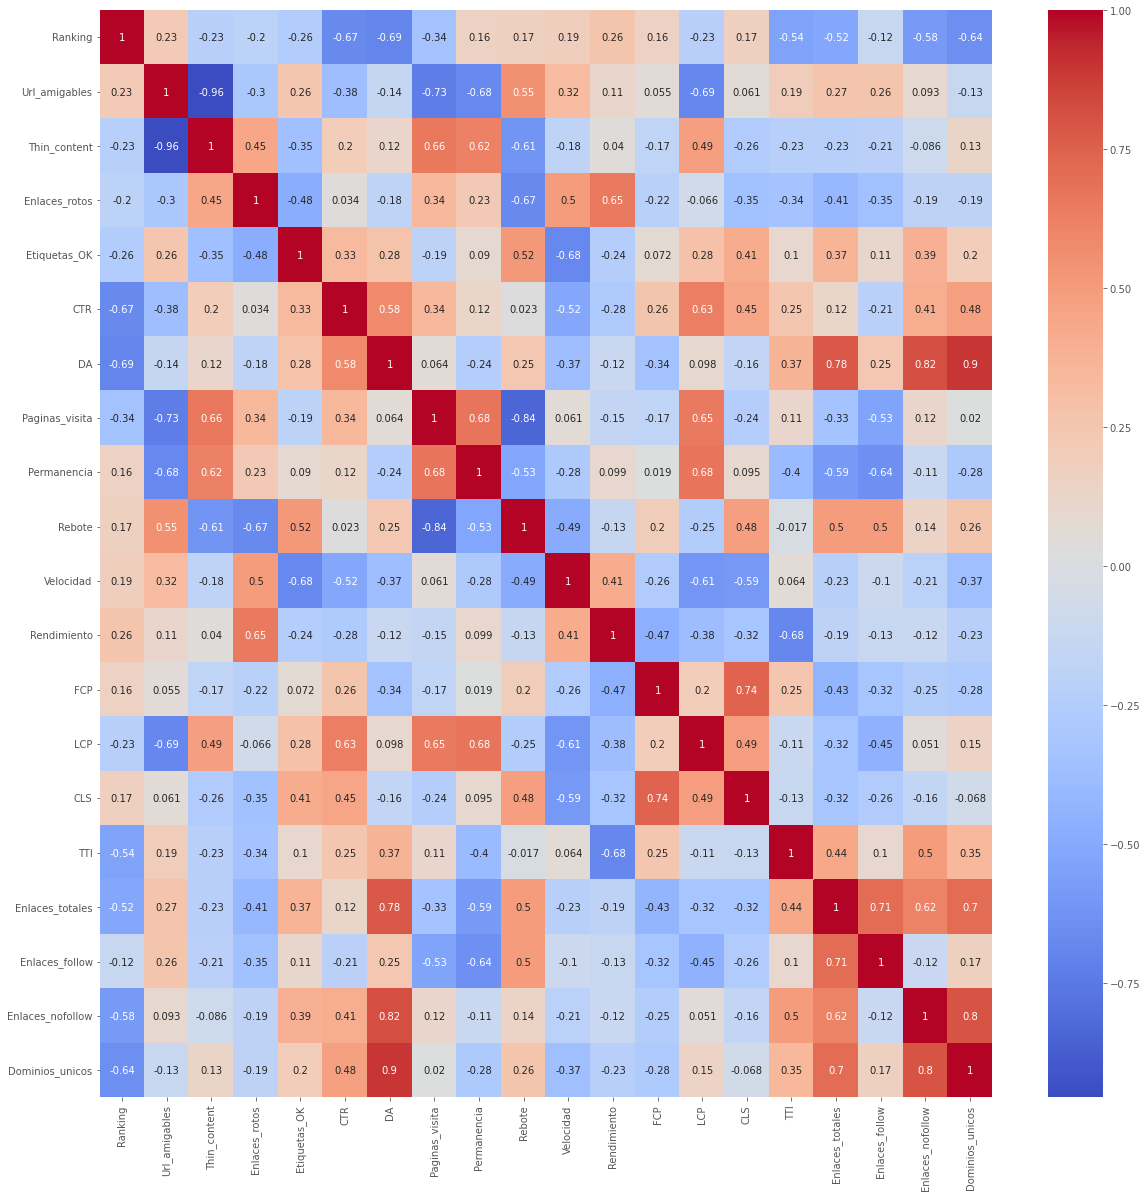

In [10]:
# Visualizamos las correlaciones como un mapa de calor
plt.figure(figsize = (20,20))
sns.heatmap(dfDatos.corr(),cmap='coolwarm', annot=True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/matrix_scatter.png', dpi=300)
plt.show()

Observando la matriz de correlaciones entre todas las métricas que hemos obtenido vemos que hay seis métricas que tienen una fuerte correlación con el ránking que son, el CTR, la autoridad del dominio, el tiempo de interactividad, los enlaces totales, los enlaces no follow y la cantidad de dominios únicos que apuntan a cada uno de los sitios web analizados

In [11]:
# En primer lugar separamos la variable respuesta de las variables predictoras descartando aquellas que no tienen influencia en el ranking
# guardamos en X todos los datos de las variables predictoras elegidas
X = dfDatos.drop(columns = ['Ranking', 'Url_amigables', 'Thin_content', 'Etiquetas_OK', 'Paginas_visita', 'Permanencia',	'Rebote', 'Enlaces_rotos', 'Velocidad', 'Rendimiento', 'FCP', 'LCP', 'TTI','CLS', 'Enlaces_follow'])
# en Y guardaremos el ranking
Y = dfDatos['Ranking']

In [12]:
# Visualizamos los datos
X

,CTR,DA,Enlaces_totales,Enlaces_nofollow,Dominios_unicos
0,0.12,32,151,139,43
1,30.38,54,798,656,152
2,0.01,48,1715,181,101
3,1.96,35,723,319,133
4,9.71,43,796,745,74
5,0.08,32,216,187,49
6,0.01,36,229,186,68
7,6.58,64,1734,1487,234
8,2.54,30,209,208,16
9,16.17,52,587,513,159


In [13]:
#Normalizamos los datos de las variables predictoras
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(X) 
X.loc[:,:] = scaled_values

# Y visualizamos
X

,CTR,DA,Enlaces_totales,Enlaces_nofollow,Dominios_unicos
0,0.003622,0.058824,0.000000,0.000000,0.123853
1,1.000000,0.705882,0.408718,0.383531,0.623853
2,0.000000,0.529412,0.987997,0.031157,0.389908
3,0.064208,0.147059,0.361339,0.133531,0.536697
4,0.319394,0.382353,0.407454,0.449555,0.266055
5,0.002305,0.058824,0.041061,0.035608,0.151376
6,0.000000,0.176471,0.049274,0.034866,0.238532
7,0.216332,1.000000,1.000000,1.000000,1.000000
8,0.083306,0.000000,0.036639,0.051187,0.000000
9,0.532104,0.647059,0.275426,0.277448,0.655963


In [14]:
# Visualizamos los datos de Y para comprobar que se ha realizado
Y

0    14
1     2
2     8
3     6
4     3
5    21
6    15
7     4
8     9
9     1
Name: Ranking, dtype: int64

In [15]:
# Creamos dos conjuntos, uno para entrenamiento (80%) y otro para test(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.values.reshape(-1,1), test_size= 0.2, random_state = 123)

In [16]:
# Visualizamos que se ha realizado correctamente
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8, 5)
(2, 5)
(8, 1)
(2, 1)


In [17]:
# Cargamos el modelo
modelo = LinearRegression()
#Entrenamos
modelo.fit(X_train,Y_train)
# Predecimos en el entrenamiento
predY_in = modelo.predict(X_train)
# Predecimos en el test
predY_out = modelo.predict(X_test)

In [18]:
# Intercept
modelo.intercept_

array([15.86448846])

In [ ]:
# Coeficientes, reflejan el impacto de cada una de las variables sobre el ranking
modelo.coef_

array([[-12.00944601,   7.73828103,  -7.22583921,   2.67968799,
        -12.72503449]])

In [ ]:
# Calculamos el coeficiente de determinación (R^2):
modelo.score(X,Y)

0.6059701099208674

El modelo con todos los predictores introducidos tiene un R2 de 0.6059, es decir, es capaz de explicar el 60.59% de la variabilidad observada en el ranking.

In [ ]:
print('El error MSE de entrenamiento es: ' + str(metrics.mean_squared_error(Y_train, predY_in)))
print('El error MSE de test es : ' + str(metrics.mean_squared_error(Y_test, predY_out)))

El error MSE de entrenamiento es: 12.970509103111388
El error MSE de test es : 23.79140397725188


Introducimos un valor en el modelo para que haga una predicción del ranking. Para el dominio lucasylola.es tenemos los siguientes datos:
- **CTR:** 3.375
- **DA:** 26
- **Enlaces totales:** 176
- **Enlaces no follow:** 71
- **Dominios únicos:** 59
- **Ranking:** 10

Debemos normalizar estos datos de entrada para introducirlos en el modelo para realizar la predicción, ya que el modelo ha sido entrenado con datos normalizados:

- **CTR:** 0.1039
- **DA:** 0
- **Enlaces totales:** 0.015
- **Enlaces no follow:** 0
- **Dominios únicos:** 0.1972
- **Ranking:** 10




In [ ]:
# Tenemos que normalizar los datos antes de introducirlos en el modelo para hacer la predicción
X_nuevo = np.array([0.1039, 0, 0.015, 0, 0.1972]).reshape(1,-1)
X_nuevo

array([[0.1039, 0.    , 0.015 , 0.    , 0.1972]])

In [ ]:
Y_pred_nuevo = modelo.predict(X_nuevo)
print('La predicción de ranking para lucasylola.es es:',np.round(Y_pred_nuevo[0,0],3))

La predicción de ranking para lucasylola.es es: 11.999
